In [2]:
# Reference: https://github.com/jovsa/rl-examples-sutton-and-barto-book/blob/master/chapter03/grid_world.py 

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use("ggplot")
from matplotlib.table import Table 

In [7]:
WORLD_SIZE = 5 
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9 

In [8]:
ACTIONS = [(0, -1), (-1, 0), (0, 1), (1, 0)]
ACTION_PROB = 0.25 

In [9]:
def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5 
        
    next_state = [state[0] + action[0], state[1] + action[1]]
    r, c = next_state
    if r < 0 or r >= WORLD_SIZE or c < 0 or c >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0. 

    return next_state, reward


In [35]:
def plot_state_function(matrix):
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_axis_off()
    
    tb = Table(ax, bbox=[0, 0, 1, 1])
    n_rows, n_cols = matrix.shape 
    width, height = 1.0 / n_cols, 1.0 / n_rows
    
    for (r, c), val in np.ndenumerate(matrix):
        color = "white"
        tb.add_cell(r, c, width, height, text=val, loc="center")
    
    ax.add_table(tb)
    

n_iters: 77


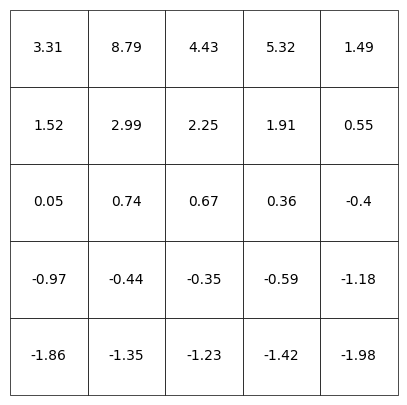

In [38]:
# Figure 3.2 
values = np.zeros((WORLD_SIZE, WORLD_SIZE))

n_iters = 0
while True:
    n_iters += 1
    new_values = np.zeros_like(values)
    for r in range(WORLD_SIZE) :
        for c in range(WORLD_SIZE):
            for action in ACTIONS:
                (r1, c1), reward = step([r, c], action)
                new_values[r, c] += ACTION_PROB * (reward + DISCOUNT * values[r1, c1])
                
    if np.sum(np.abs(values - new_values)) < 1e-4:
        plot_state_function(np.round(values, decimals=2))
        break        
        
    values = new_values

print(f"n_iters: {n_iters}")

n_iters: 124


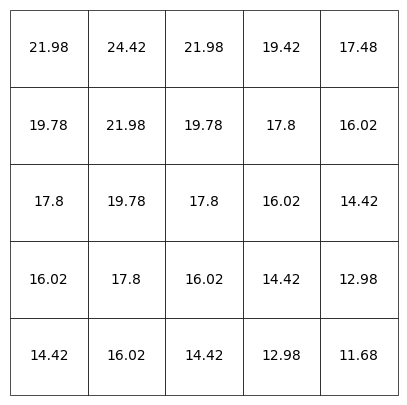

In [39]:
# Figure 3.5 
values = np.zeros((WORLD_SIZE, WORLD_SIZE))

n_iters = 0
while True:
    n_iters += 1
    new_values = np.zeros_like(values)
    for r in range(WORLD_SIZE) :
        for c in range(WORLD_SIZE):
            a_values = []
            for action in ACTIONS:
                (r1, c1), reward = step([r, c], action)
                a_values.append(reward + DISCOUNT * values[r1, c1])
                
            new_values[r, c] = max(a_values)
                
    if np.sum(np.abs(values - new_values)) < 1e-4:
        plot_state_function(np.round(values, decimals=2))
        break        
        
    values = new_values

print(f"n_iters: {n_iters}")